In [3]:
# k- means clustering visualization
# packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# inline 
%matplotlib inline

In [4]:
# importing the Data

dataset = pd.read_csv("Datasets/heart.csv")

In [36]:
x = dataset[dataset.columns[-3:]]
x = x.convert_objects(convert_numeric=True)
#x = pd.to_numeric

x.head()

G:\Daviance\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,ca,thal,target
0,0,1,1
1,0,2,1
2,0,2,1
3,0,2,1
4,0,2,1


In [37]:
# Eliminating null values
for i in x.columns:
    x[i].fillna(int (x[i].mean()))
    
for i in x.columns:
    print(x[i].isnull().sum())

0
0
0


In [38]:
# using the Elbow Method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []

for i in range(0, 11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    #visual
plt.plot(range(0,11),  wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

G:\Daviance\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:88: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: cannot convert float infinity to integer

In [39]:
 # applying kmeans in our heart dataset
from sklearn.cluster import KMeans  
    
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init =10, random_state = 0)    
y_kmeans = kmeans.fit_predict(x)
x = x.as_matrix(columns = None)


In [40]:
print(x)

[[0 1 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 1 1]
 [0 2 1]
 [0 3 1]
 [0 3 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [2 2 1]
 [0 3 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 3 1]
 [2 2 1]
 [0 2 1]
 [0 2 1]
 [1 2 1]
 [0 2 1]
 [1 2 1]
 [0 3 1]
 [0 2 1]
 [1 2 1]
 [1 2 1]
 [0 2 1]
 [0 2 1]
 [0 3 1]
 [0 2 1]
 [0 2 1]
 [1 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 0 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [3 3 1]
 [0 2 1]
 [0 2 1]
 [1 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [1 2 1]
 [1 2 1]
 [0 3 1]
 [0 1 1]
 [0 1 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 3 1]
 [1 3 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 3 1]
 [0 2 1]
 [0 2 1]
 [1 2 1]
 [0 3 1]
 [0 2 1]
 [0 3 1]
 [1 3 1]
 [0 3 1]
 [0 2 1]
 [0 2 1]
 [2 2 1]
 [0 3 1]
 [4 2 1]
 [1 2 1]
 [0 2 1]
 [0 3 1]
 [0 2 1]
 [3 3 1]
 [1 2 1]
 [3 2 1]
 [2 2 1]
 [0 3 1]
 [2 2 1]
 [0 3 1]
 [0 2 1]
 [0 2 1]
 [1 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 [0 2 1]
 

ValueError: x and y must be the same size

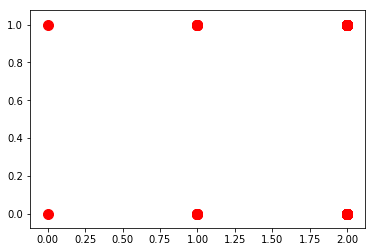

In [41]:
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s=100, c='red', label='sex')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 0, 2], s=100, c='blue', label='cp')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 0, 2], s=100, c='green', label='fbs')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],s=300, c='yellow',label='centroids')
plt.title('Cluster heart disease make')
plt.legend()
plt.show()